In [5]:
#getting the measurements
import random
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [12]:
measures = list()
for i in range(501):
    x = np.random.randint(39, 57)
    y = np.random.randint(28, 36)
    measures.append([x,y])
measures = np.array(measures)
print(measures)

[[52 30]
 [47 28]
 [54 29]
 ...
 [51 35]
 [49 31]
 [44 30]]


(35.0, 60.0, 25.0, 40.0)

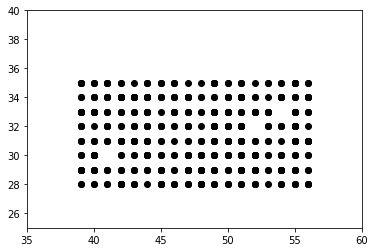

In [13]:
for i in range(len(measures)):
    plt.scatter(measures[i][0], measures[i][1], c="black")
plt.axis([35, 60, 25, 40])

In [14]:
#take initial 3 points as centroids for clusters and computes the clusters
k = 3
centroids = {}
clusters = {}
for i in range(k):
    clusters[i] = []
    centroids[i] = measures[i]
diff = 999
while diff:
    clusters = {}
    for i in range(k):
        clusters[i] = []
    for i in range(3, len(measures)):
        d1 = np.sqrt((centroids[0][0]-measures[i][0])**2 + (centroids[0][1]-measures[i][1])**2)
        d2 = np.sqrt((centroids[1][0]-measures[i][0])**2 + (centroids[1][1]-measures[i][1])**2)
        d3 = np.sqrt((centroids[2][0]-measures[i][0])**2 + (centroids[2][1]-measures[i][1])**2)
        if d1 < d2 and d1 < d3:
            clusters[0].append(measures[i])
        elif d2 < d3:
            clusters[1].append(measures[i])
        else:
            clusters[2].append(measures[i])
    sum_0x, sum_0y, sum_0, sum_1x, sum_1y, sum_1, sum_2x, sum_2y, sum_2 = 0, 0, [], 0, 0, [], 0, 0, []
    for i in range(len(clusters[0])):
        sum_0x += clusters[0][i][0]
        sum_0y += clusters[0][i][1]
    for i in range(len(clusters[1])):
        sum_1x += clusters[1][i][0]
        sum_1y += clusters[1][i][1]
    for i in range(len(clusters[2])):
        sum_2x += clusters[2][i][0]
        sum_2y += clusters[2][i][1]
    sum_0 = [sum_0x/len(clusters[0]), sum_0y/len(clusters[0])]
    sum_1 = [sum_1x/len(clusters[1]), sum_1y/len(clusters[1])]
    sum_2 = [sum_2x/len(clusters[2]), sum_2y/len(clusters[2])]
    diff0_x, diff0_y = abs(sum_0[0]-centroids[0][0]), abs(sum_0[1]-centroids[0][1])
    diff1_x, diff1_y = abs(sum_1[0]-centroids[1][0]), abs(sum_1[1]-centroids[1][1])
    diff2_x, diff2_y = abs(sum_2[0]-centroids[2][0]), abs(sum_2[1]-centroids[2][1])
    diff = diff0_x  and diff0_y and diff1_x and diff1_y and diff2_x and diff2_y
    centroids[0] = sum_0
    centroids[1] = sum_1
    centroids[2] = sum_2

(35.0, 60.0, 25.0, 40.0)

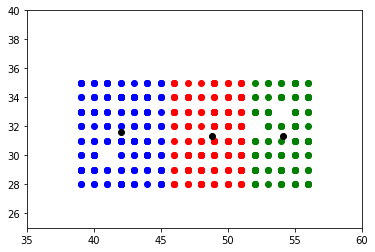

In [15]:
for i in range(len(clusters[0])):
    plt.scatter(clusters[0][i][0], clusters[0][i][1], c="red")
for i in range(len(clusters[1])):
    plt.scatter(clusters[1][i][0], clusters[1][i][1], c="blue")
for i in range(len(clusters[2])):
    plt.scatter(clusters[2][i][0], clusters[2][i][1], c="green")
plt.scatter(centroids[0][0], centroids[0][1], c="black")
plt.scatter(centroids[1][0], centroids[1][1], c="black")
plt.scatter(centroids[2][0], centroids[2][1], c="black")
plt.axis([35, 60, 25, 40])

In [16]:
#3 sizes in India 
print(centroids)

{0: [48.797814207650276, 31.3551912568306], 1: [41.98941798941799, 31.597883597883598], 2: [54.13492063492063, 31.357142857142858]}
